In [667]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras.layers import *

In [695]:
data = pd.read_csv('../datasets/prep_total.csv', index_col= 0)
data.columns

Index(['성별', '생년', '검진년도', '검진 시 연령', '키', '체중', '허리둘레', 'BMI', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '요단백', '헤모글로빈', '공복혈당',
       '총콜레스테롤', 'HDL', '중성지방', 'LDL', '혈청크레아티닌', '신사구체여과율', 'AST', 'ALT',
       'GTP', '폐결핵흉부질환'],
      dtype='object')

In [670]:
data = data[['검진 시 연령','체중', '허리둘레', 'BMI','수축기혈압', '이완기혈압']]

In [671]:
data.reset_index(inplace= True)

In [672]:
# 검진 시 연령, 허리둘레, BMI, 수축기혈압, 이완기혈압, 헤모글로빈, 공복혈당, 총콜레스테롤, HDL, LDL, 중성지방

In [673]:
data.rename(columns={'고유값':'일련번호'}, inplace=True)

In [674]:
data

,일련번호,검진 시 연령,체중,허리둘레,BMI,수축기혈압,이완기혈압
0,M0,34,64.0,72.0,21.1,130,80
1,M0,35,68.0,79.0,22.2,120,70
2,M0,36,68.0,76.0,22.2,120,70
3,M0,37,81.0,92.0,26.4,134,79
4,M0,38,86.0,96.0,28.1,137,83
...,...,...,...,...,...,...,...
1063,F30,45,54.0,75.0,22.8,109,67
1064,F30,46,55.0,70.0,23.2,118,68
1065,F30,47,54.2,69.0,23.0,119,68
1066,F30,48,54.7,75.8,23.3,112,74


In [675]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일련번호     1068 non-null   object 
 1   검진 시 연령  1068 non-null   int64  
 2   체중       1068 non-null   float64
 3   허리둘레     1067 non-null   float64
 4   BMI      1068 non-null   float64
 5   수축기혈압    1068 non-null   int64  
 6   이완기혈압    1068 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 58.5+ KB


In [676]:
data.columns

Index(['일련번호', '검진 시 연령', '체중', '허리둘레', 'BMI', '수축기혈압', '이완기혈압'], dtype='object')

In [677]:
data.dropna(axis=0, inplace= True)

In [678]:
data['일련번호'].unique()

array(['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10',
       'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19',
       'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28',
       'M29', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37',
       'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46',
       'M47', 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55',
       'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62', 'M63', 'M64',
       'M65', 'M66', 'M67', 'M68', 'M69', 'M70', 'M71', 'M72', 'M73',
       'M74', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',
       'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18',
       'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27',
       'F28', 'F29', 'F30'], dtype=object)

In [679]:
grouped = data.groupby(['일련번호'])

In [680]:
grouped_df = {}
for key, group in grouped:
  print('key: ', key)
  print('number: ', len(group))
  grouped_df[key] = group
  print(group.head())

key:  F0
number:  11
    일련번호  검진 시 연령    체중  허리둘레   BMI  수축기혈압  이완기혈압
753   F0       33  47.0  67.0  20.3    113     72
754   F0       34  45.0  66.0  19.5    111     75
755   F0       35  46.0  60.0  19.9    115     75
756   F0       36  44.0  68.0  19.3    112     81
757   F0       37  44.0  65.0  19.0    110     70
key:  F1
number:  10
    일련번호  검진 시 연령    체중  허리둘레   BMI  수축기혈압  이완기혈압
764   F1       51  60.0  75.0  22.3    114     73
765   F1       52  59.0  82.0  22.5    100     80
766   F1       53  59.0  74.0  22.5     90     60
767   F1       54  59.0  75.0  22.2    117     73
768   F1       55  60.0  75.0  22.6    110     70
key:  F10
number:  12
    일련번호  검진 시 연령    체중  허리둘레   BMI  수축기혈압  이완기혈압
854  F10       30  45.0  61.0  19.2    113     68
855  F10       31  44.0  59.0  18.6    100     60
856  F10       32  42.0  63.0  17.9    120     60
857  F10       33  46.0  69.0  19.9    111     60
858  F10       34  44.0  60.0  19.3    104     75
key:  F11
number:  10
    일련번호  검진 시

166  M16       47  72.0  78.0  23.5    110     70
key:  M17
number:  10
    일련번호  검진 시 연령    체중  허리둘레   BMI  수축기혈압  이완기혈압
172  M17       29  67.0  80.0  22.4    138     79
173  M17       30  70.0  81.0  23.4    100     60
174  M17       31  69.0  78.0  23.1    139     82
175  M17       32  70.0  84.0  23.9    110     74
176  M17       33  67.0  79.0  22.1    110     76
key:  M18
number:  10
    일련번호  검진 시 연령    체중  허리둘레   BMI  수축기혈압  이완기혈압
182  M18       43  84.0  89.0  29.4    115     70
183  M18       44  77.0  86.0  27.3    120     80
184  M18       45  83.0  88.0  29.0    125     80
185  M18       46  82.0  84.0  28.4    133     63
186  M18       47  82.0  90.0  29.1    126     82
key:  M19
number:  10
    일련번호  검진 시 연령    체중  허리둘레   BMI  수축기혈압  이완기혈압
192  M19       47  67.0  84.0  23.8    115     75
193  M19       48  63.0  86.0  22.2    110     70
194  M19       49  66.0  78.0  23.6    110     80
195  M19       50  65.0  84.0  23.0    130     85
196  M19       51  65.0  86.0  23.

    일련번호  검진 시 연령    체중  허리둘레   BMI  수축기혈압  이완기혈압
703  M70       38  74.0  86.0  25.5    140    100
704  M70       39  67.0  78.0  23.1    110     70
705  M70       40  74.0  86.0  25.6    143     83
706  M70       41  77.0  93.0  26.6    140     85
707  M70       42  77.0  92.0  27.0    139     86
key:  M71
number:  10
    일련번호  검진 시 연령    체중  허리둘레   BMI  수축기혈압  이완기혈압
713  M71       26  69.0  76.0  22.0    120     80
714  M71       27  75.0  80.0  23.6    130     80
715  M71       28  74.0  78.0  23.6    120     75
716  M71       29  79.0  86.0  24.9    120     80
717  M71       30  82.0  90.0  25.9    119     78
key:  M72
number:  10
    일련번호  검진 시 연령    체중  허리둘레   BMI  수축기혈압  이완기혈압
723  M72       41  63.0  79.0  21.8    120     80
724  M72       42  61.0  79.0  21.4    110     72
725  M72       43  63.0  79.0  21.8    110     70
726  M72       44  63.0  78.0  21.8    114     70
727  M72       45  63.0  76.0  21.5    110     80
key:  M73
number:  10
    일련번호  검진 시 연령    체중  허리둘레   BM

In [681]:
from sklearn.preprocessing import MinMaxScaler

In [682]:
minmaxscaler = MinMaxScaler()

In [683]:
grouped_df.keys()

dict_keys(['F0', 'F1', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F2', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F3', 'F30', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'M0', 'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M2', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29', 'M3', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M4', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M5', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M6', 'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M7', 'M70', 'M71', 'M72', 'M73', 'M74', 'M8', 'M9'])

In [684]:
# Groupby한 것을 잘라서 각각 스케일링하고 시퀀스작업도 각각해야함
X_list = []
Y_list = []
for key in grouped_df.keys():
    # 스케일링
    scaled_data = minmaxscaler.fit_transform(grouped_df[key][['검진 시 연령', '체중',
                                                              '허리둘레', 'BMI', '수축기혈압', '이완기혈압']])
    
    # 시퀀스작업
    for i in range(0, len(scaled_data) - 4):
        _x = scaled_data[i : i + 4]
        _y = scaled_data[i + 4][4]
        X_list.append(_x)
        Y_list.append(_y)

In [685]:
sequence_X = np.array(X_list)
sequence_Y = np.array(Y_list)
print(sequence_X.shape)
print(sequence_Y.shape)

(643, 4, 6)
(643,)


In [686]:
from sklearn.model_selection import train_test_split

In [687]:
X_train, X_test, Y_train, Y_test = train_test_split(sequence_X, sequence_Y, test_size = 0.2, random_state = 77)
X_train.shape, X_test.shape, Y_train.shape

((514, 4, 6), (129, 4, 6), (514,))

In [689]:
model = Sequential()
model.add(LSTM(1000, input_shape = (X_train.shape[1], X_train.shape[2]), activation= 'tanh'))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss= 'mse', optimizer= 'adam')
early_stop = keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 10)
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 1000)              4028000   
_________________________________________________________________
flatten_21 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 1001      
Total params: 4,029,001
Trainable params: 4,029,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=True))
# model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(64, activation='tanh', return_sequences=True))
# model.add(LSTM(64, activation='tanh', return_sequences=True))
# model.add(Dropout(0.3))

# model.add(LSTM(64, activation='tanh', return_sequences=False))

# model.add(Flatten())
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')
# model.summary()

In [690]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience= 20)
fit_hist = model.fit(X_train, Y_train, epochs = 500, validation_data= (X_test, Y_test), shuffle= False, callbacks= [early_stop])

Train on 514 samples, validate on 129 samples
Epoch 1/500
514/514 [==============================] - 9s 18ms/sample - loss: 0.1472 - val_loss: 0.1376
Epoch 2/500
514/514 [==============================] - 7s 13ms/sample - loss: 0.1132 - val_loss: 0.1259
Epoch 3/500
514/514 [==============================] - 7s 13ms/sample - loss: 0.1092 - val_loss: 0.1215
Epoch 4/500
514/514 [==============================] - 7s 13ms/sample - loss: 0.1068 - val_loss: 0.1190
Epoch 5/500
514/514 [==============================] - 7s 13ms/sample - loss: 0.1053 - val_loss: 0.1159
Epoch 6/500
514/514 [==============================] - 7s 13ms/sample - loss: 0.1037 - val_loss: 0.1146
Epoch 7/500
514/514 [==============================] - 7s 13ms/sample - loss: 0.1022 - val_loss: 0.1150
Epoch 8/500
514/514 [==============================] - 7s 13ms/sample - loss: 0.1019 - val_loss: 0.1153
Epoch 9/500
514/514 [==============================] - 7s 13ms/sample - loss: 0.1022 - val_loss: 0.1148
Epoch 10/500
514/5

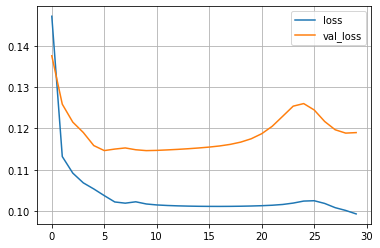

In [691]:
plt.plot(fit_hist.history['loss'], label= 'loss')
plt.plot(fit_hist.history['val_loss'], label= 'val_loss')
plt.legend()
plt.grid()
plt.show()

In [692]:
predict = model.predict(X_test)

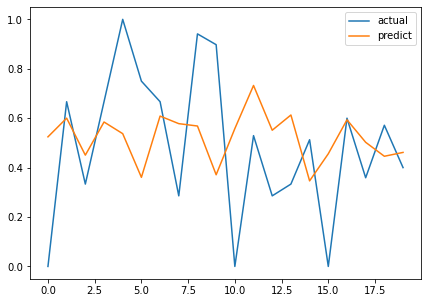

In [693]:
fig = plt.figure(figsize = (7,5))
plt.plot(Y_test[-20:], label= 'actual')
plt.plot(predict[-20:], label= 'predict')
plt.legend()
plt.show()

In [ ]:
# fig.savefig('../datasets/bp_graph/4개씩.png')